<a href="https://colab.research.google.com/github/nurfnick/Operations_Research/blob/main/ChapterRecursion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recursion

Recursion is one of these topics then when you see it once, you'll see it again and again forever.  Terrible I know...

Seriously it is best described as a function that calls itself.  We see these often in simple mathematical questions.  





## Exponential Growth

Consider a population of aemebas that double every cycle.  Write a recursive relationship describing this doubling.  

We see simply that $f(n+1) = 2f(n)$ so if you go to the new cycle, $n+1$, you will be double the previous.  The question then arrifes how do we write the function $f(n)$ where it does not reference itself?

If you recall college algebra, you can write this function as $f(n) = P_02^n$  Here $P_0$ is some initial population.  

Let's code both of these by setting $f(0) = P_0 = 1$ (we always need an initial conditon to fully sovle these equations)

In [ ]:
def f_recursive(n):
  if n>=1:
    return 2*f_recursive(n-1)
  elif n==0:
    return 1

def f_exponential(n):
  return 1*2**n

In [ ]:
f_recursive(5)

32

In [ ]:
f_exponential(5)

32

We'll look at the graphs of each.

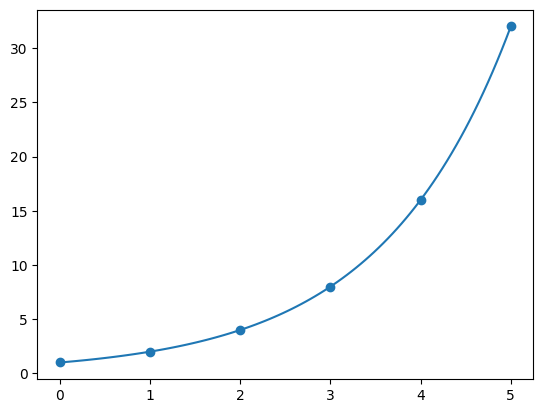

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,5,100)
y = f_exponential(x)

z = range(0,6)
zz = [f_recursive(i) for i in z]

plt.scatter(z,zz)
plt.plot(x,y)

These look spot on!  How would we go about converting something that maybe is not so simple or well known?  We guess that the solution is $f(x) = c a^x$ and plug it in and see if we can solve for $a$ ($c$ will just drop out most of the time so I'll forget about it until I ask for initial conditions)

$$f(n+1) = 2f(n)$$

$$ca^{n+1} = 2ca^{n}$$

Divide by $ca^n$ and get

$$a = 2$$

## Something More Exotic

What is we had a recurrance relaionship of the form
$$
f(n) = -3f(n-1)+4f(n-2)
$$
Beacause there are two prior steps, our initial condition will need two parts.
$$
f(0) = 1\quad\quad f(1) =2
$$

We can of course define it via python recursively:

In [ ]:
def f(n):
  if n>1:
    return -3*f(n-1)+4*f(n-2)
  if n==1:
    return 2
  if n==0:
    return 1

[f(i) for i in range(10)]

[1, 2, -2, 14, -50, 206, -818, 3278, -13106, 52430]

How could we get an analytic solution for this?  Let's guess that the solution is $f(n) = r^n$.  Plugging this into our reccurance relation, we see that,
$$
r^n = 3r^{n-1} -4r^{n-2}
$$

With some algebra, we see that
$$
0= r^n+3r^{n-1}-4r^{n-2} = r^{n-2}\left(r^2+3r-4\right) = r^{n-2}(r+4)(r-1)
$$

So we see that either $r=0$ (trivial solution and doesn't work with our initial conditions) or $r=-4$ or $r=1$.

To finish then, we utilize our initial conditions and recall tha I should have used $f(n) = c r^n$. We arrive at
$$
f(n) = c_1(-4)^n+c_21^n\\
f(0) = c_1+c_2 = 1\\
f(1) = -4c_1 +c_2 = 2
$$

Solving the above system for $c_1$ and $c_2$ we see that $c_1 = -\frac15$ and $c_2 = \frac65$.  

Putting it all together

$$
f(n) = -\frac15(-4)^n+\frac65 1^n
$$

We define this function with python

In [ ]:
def f(x):
  return -1/5*(-4)**x+6/5

[f(i) for i in range(10)]

[1.0, 2.0, -2.0, 14.0, -50.0, 206.0, -818.0, 3278.0, -13106.0, 52430.0]

## Repeated Roots

If you happen to get a repeated root, you can still use this method except that the solution will be of the form,
$$
f(n) = c_1r^n+c_2nr^n
$$
The extra $n$ in the second term will account for the repeated root.  Let's see this in play with an example:

### Example
Solve
$$
f(n) = 4f(n-1)-4f(n-2) \quad\quad f(0) =f(1) =  1
$$

We rewrite into the form as discussed above:
$$
r^n = 4r^{n-1}-4r^{n-2}
$$
Apply a little agebraic magic to get
$$
r^n-4r^{n-1}+4r^{n-2} = r^{n-2}(r^2-4r+4) = r^{n-2}(r-2)^2
$$
So $r=2$ is a solution and repeated!

Using the form discussed above, we see that
$$
f(n) = c_12^n+c_2n2^n
$$
We apply the initial conditions to solve for $c_1$ and $c_2$.
$$f(0) = 1 = c_1$$
$$f(1) = 1 = 2c_1+2c_2$$
So $c_1 = 1$ and $c_2 = -\frac12$.  Making
$$
f(n) = 2^n-\frac{n}2 2^n
$$
Let's test these solutions.

In [2]:
def f(n):
  if n==0:
    return 1
  elif n==1:
    return 1
  else:
    return 4*f(n-1)-4*f(n-2)

[f(i) for i in range(10)]

[1, 1, 0, -4, -16, -48, -128, -320, -768, -1792]

In [3]:
def f(x):
  return 2**x-x/2*2**x

[f(i) for i in range(10)]

[1.0, 1.0, 0.0, -4.0, -16.0, -48.0, -128.0, -320.0, -768.0, -1792.0]

## Non-Homogeneous

Thus fas all of the recursive functions we have dealt with had only factors invloving the function before.  Often this will not be the case.  When we have a term that is not recursively defined, we will attempt to use a function that is of the same form as our term.  We will have to use some _undetermined coefficients_ to fully solve the problem.  Let's see this in action

### Example
$$
f(n) = -3f(n-1)+4f(n-2) +5^n
\quad
f(0) = 1\quad\quad f(1) =2
$$

This is the same recurance relation that we examined before.  The homogeneous part of the solution will stay the same.
$$
f_H(n) = c_1(-4)^n+c_21^n
$$
We make a guess at the particular solution
$$
f_P(n) = a5^n
$$
We see what happens when we plug this into the original equation.
$$
a5^n = -3a5^{n-1}+4a5^{n-2}+5^n
$$
We want to find what $a$ solves the above equation.  Rearranging we see that
$$
0=(a-1)5^n +3a5^{n-1}-4a5^{n-2} = 5^{n-2}((a-1)5^2 +3a5-4a) = 5^{n-2}\left(25a-25+15a-4a\right) = 5^{n-2}\left(36a-25\right)
$$
So to solve this equation $a = \frac{25}{36}$.

To get the full solution, we combine the homogeneous and particular solution
$$
f(n) = f_H(n) +f_P(n) = c_1(-4)^n+c_2+\frac{25}{36} 5^n
$$
We now solve for the initial conditions.
$$
f(0) = 1 = c_1+c_2+\frac{25}{36}
$$
and
$$
f(1) = 2 = -4c_1+c_2+\frac{125}{36}
$$

After some work, I arrive at $c_1 = \frac{16}{45}$ and $c_2 = -\frac1{20}$

So the full solution is
$$
f(n) = \frac{16}{45}(-4)^n-\frac1{20}+\frac{25}{36}5^n
$$

### Forms for the Non Homogeneous Part

|Equation|Form of the Non-Homogeneous Part with undetermined coefficients|
|-------|---------------------------------------------------------------------|
|Polynomial|$f_P = an^x+bn^{x-1}+cn^{x-2}+\cdots gn+f$|
|Exponential with base $a$ | $f_P = ca^n$|
|Sine and Cosine| $f_P = a\sin n+ b\cos n$|


##References

____Discrete Math____ https://discrete.openmathbooks.org/dmoi3/dmoi.html by Oscar Levin

___Python Programming and Numerical Methods___ https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html
